In [22]:
import numpy as np
from tensorflow.keras import regularizers
import math
import tensorflow as fl
import tensorflow.keras.layers as tfl
from keras import backend as k

In [23]:
import matplotlib.pyplot as plt

from PIL import Image

import seaborn as sns

import cv2

In [24]:
from tensorflow.keras.datasets import cifar100
(X_train, y_train), (X_test, y_test) = cifar100.load_data(label_mode='coarse')

In [25]:
print(X_train.shape, y_train.shape)

(50000, 32, 32, 3) (50000, 1)


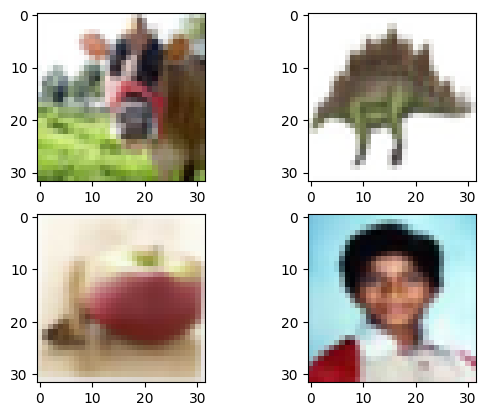

In [26]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(X_train[0])
axs[0,1].imshow(X_train[1])
axs[1,0].imshow(X_train[2])
axs[1,1].imshow(X_train[3])

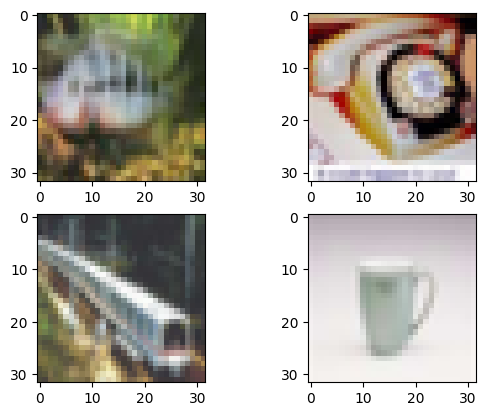

In [27]:
fig, axs = plt.subplots(2,2)
axs[0,0].imshow(X_train[4])
axs[0,1].imshow(X_train[5])
axs[1,0].imshow(X_train[6])
axs[1,1].imshow(X_train[7])

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
y_train_cat=to_categorical(y_train)
y_test_cat=to_categorical(y_test)

In [30]:
# Check input shape
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)


In [31]:
import cv2
import numpy as np
#X_train = np.array([cv2.resize(img, (140, 140)) for img in X_train])
#X_test = np.array([cv2.resize(img, (140, 140)) for img in X_test])

In [32]:
#from sklearn.preprocessing import OneHotEncoder

#enc = OneHotEncoder()
#y_train=enc.fit_transform(y_train).toarray().astype(int)
#y_test=enc.transform(y_test).toarray().astype(int)

#print(y_train.shape)
#print(y_train[0])

In [33]:
#X_train=X_train/255
#X_test=X_test/255

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, BatchNormalization,Dense, Conv2D , MaxPooling2D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop= EarlyStopping(monitor='val_loss', patience=2)

In [45]:
model = Sequential()

In [46]:
model.add(Conv2D (filters=32, kernel_size=(2,2),input_shape=(32,32,3), activation='relu'))
model.add(Conv2D (filters=32, kernel_size=(2,2), activation='relu'))

model.add(MaxPooling2D (pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(2500,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(20,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 31, 31, 32)        416       
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_3 (Dense)             (None, 2500)              18002500  
                                                                 
 dense_4 (Dense)             (None, 50)                125050    
                                                      

In [39]:
from tensorflow.keras.utils import plot_model

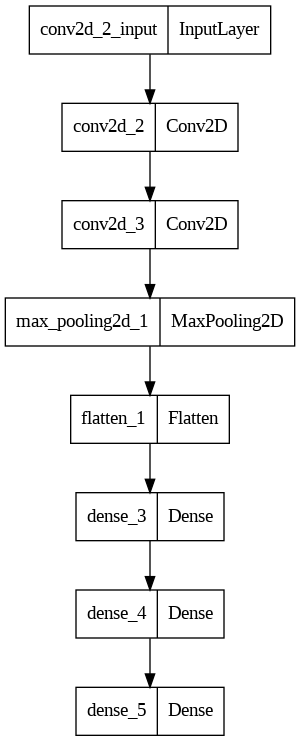

In [40]:
plot_model(model)

In [47]:
import tensorflow as tf

X_test = tf.image.resize(X_test, (32, 32))

In [48]:
history= model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_test, y_test_cat),batch_size=256, callbacks=[early_stop] )

Epoch 1/10
196/196 [==============================] - 10s 22ms/step - loss: 11.1889 - accuracy: 0.0471 - val_loss: 2.9958 - val_accuracy: 0.0500
Epoch 2/10
196/196 [==============================] - 4s 20ms/step - loss: 2.9958 - accuracy: 0.0475 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 3/10
196/196 [==============================] - 4s 20ms/step - loss: 2.9958 - accuracy: 0.0477 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 4/10
196/196 [==============================] - 4s 20ms/step - loss: 2.9958 - accuracy: 0.0500 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 5/10
196/196 [==============================] - 4s 20ms/step - loss: 2.9958 - accuracy: 0.0476 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 6/10
196/196 [==============================] - 4s 20ms/step - loss: 2.9958 - accuracy: 0.0492 - val_loss: 2.9957 - val_accuracy: 0.0500
Epoch 7/10
196/196 [==============================] - 4s 20ms/step - loss: 2.9958 - accuracy: 0.0486 - val_loss: 2.9957 - val_accuracy: 0.05

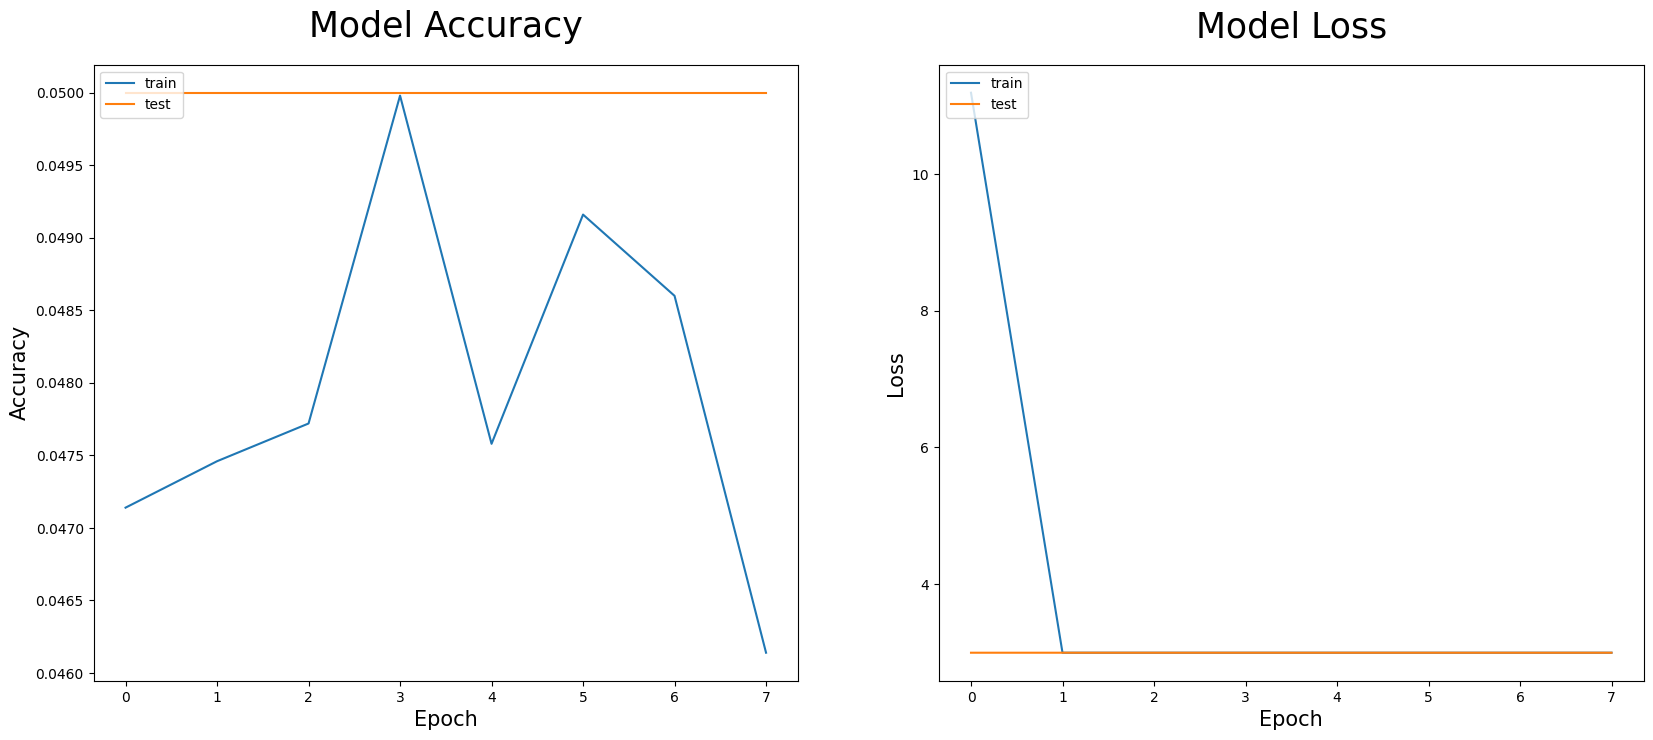

In [49]:
# Plotting the Model Accuracy & Model Loss vs Epochs (Hidden Input)
plt.figure(figsize=[20,8])

# summarize history for accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', size=25, pad=20)
plt.ylabel('Accuracy', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', size=25, pad=20)
plt.ylabel('Loss', size=15)
plt.xlabel('Epoch', size=15)
plt.legend(['train', 'test'], loc='upper left')
plt.show()
